# Validating the Model previously created

In [1]:
import torch
import cv2 as cv
from google.colab.patches import cv2_imshow as cv_imshow
import torchvision.models as models
from torchvision import transforms
import torch.nn as nn
import PIL
from PIL import Image
from torch.utils.data import DataLoader

In [2]:
Model = models.resnet18(pretrained=True)
num_classes = 26
Model.fc = nn.Linear(Model.fc.in_features, num_classes)
Model.load_state_dict(torch.load('/content/drive/MyDrive/Hear the Sign/Main files/hear_the_sign-rebooted.pth'))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 178MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
preprocess = transforms.Compose([
    transforms.Resize((256,256),PIL.Image.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [4]:
def predict_image(image_path, model, class_names, device):
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        output = model(input_tensor)
        _, pred = torch.max(output, 1)

    return class_names[pred.item()]

In [5]:
Letters = [chr(i) for i in range(65, 91)]

In [6]:
predicted_class_1 = predict_image(image_path='/content/drive/MyDrive/Hear the Sign/Main files/M.jpg',model=Model,class_names=Letters,device=device)

For Image-1


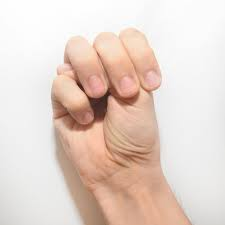

the given image belongs to :  M Class


In [11]:
print("For Image-1")
Img_1 = cv.imread("/content/drive/MyDrive/Hear the Sign/Main files/M.jpg")
cv_imshow(Img_1)
print("the given image belongs to : ",predicted_class_1,"Class")

In [12]:
predicted_class_2= predict_image(image_path='/content/drive/MyDrive/Hear the Sign/Main files/V.jpg',model=Model,class_names=Letters,device=device)

For Image-2


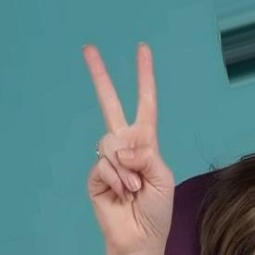

the given image belongs to :  V Class


In [13]:
print("For Image-2")
Img_1 = cv.imread("/content/drive/MyDrive/Hear the Sign/Main files/V.jpg")
cv_imshow(Img_1)
print("the given image belongs to : ",predicted_class_2,"Class")

In [7]:
predicted_class_3 = predict_image(image_path='/content/drive/MyDrive/Hear the Sign/Main files/D.jpg',model=Model,class_names=Letters,device=device)

For Image-2


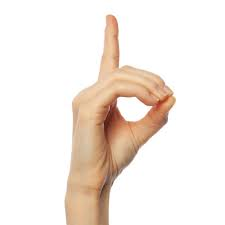

the given image belongs to :  D Class


In [8]:
print("For Image-2")
Img_1 = cv.imread("/content/drive/MyDrive/Hear the Sign/Main files/D.jpg")
cv_imshow(Img_1)
print("the given image belongs to : ",predicted_class_3,"Class")